In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Find the approximate intersection of three lines defined by the following equations:

y = x + 1

y = 4 - x

y = 2x - 1

![alt text](./assets/1.png)

In [166]:
def equation_one(x):
    return x + 1

def equation_two(x):
    return 4 - x

def equation_three(x):
    return 2 * x -1


In [167]:

Xs = np.linspace(1, 3, 10)
Xs

array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
       2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ])

In [168]:

y1 = equation_one(Xs)
y2 = equation_two(Xs)
y3 = equation_three(Xs)

y1,y2,y3

(array([2.        , 2.22222222, 2.44444444, 2.66666667, 2.88888889,
        3.11111111, 3.33333333, 3.55555556, 3.77777778, 4.        ]),
 array([3.        , 2.77777778, 2.55555556, 2.33333333, 2.11111111,
        1.88888889, 1.66666667, 1.44444444, 1.22222222, 1.        ]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]))

In [169]:
""" 
y = x + 1
y = 4 - x
=>
-x + y = 1
x + y = 4
""" 

A = np.array([[-1, 1], [1, 1]]).T
B = np.array([[1, 4]]).T
intersection_one = np.linalg.inv(A).dot(B)
intersection_one

array([[1.5],
       [2.5]])

In [170]:
""" 
y = x + 1
y = 2x - 1
=>
-x + y = 1
-2x + y = -1
""" 

A = np.array([[-1, -2], [1, 1]]).T
B = np.array([[1, -1]]).T
intersection_two = np.linalg.inv(A).dot(B)
intersection_two

array([[2.],
       [3.]])

In [171]:
""" 
y = 4 - x
y = 2x - 1
=>
x + y = 4
-2x + y = -1
""" 

A = np.array([[1, -2], [1, 1]]).T
B = np.array([[4, -1]]).T
intersection_three = np.linalg.inv(A).dot(B)
intersection_three

array([[1.66666667],
       [2.33333333]])

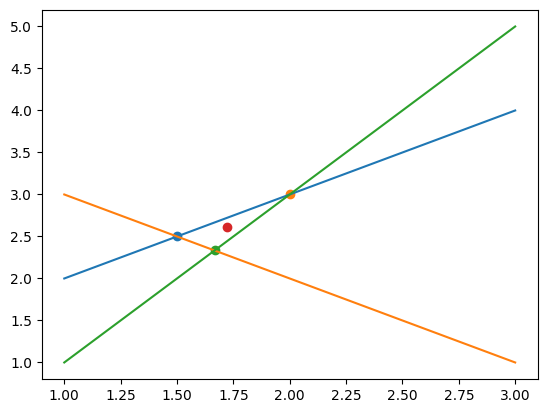

array([[1.72222222],
       [2.61111111]])

In [172]:
plt.plot(Xs, y1, label='y1')
plt.plot(Xs, y2, label='y2')
plt.plot(Xs, y3, label='y3')

plt.scatter(*intersection_one)
plt.scatter(*intersection_two)
plt.scatter(*intersection_three)

center = np.array([intersection_one, intersection_two, intersection_three]).mean(axis=0)

plt.scatter(*center)
plt.show()
center

[[1.64285714]
 [2.42857143]]


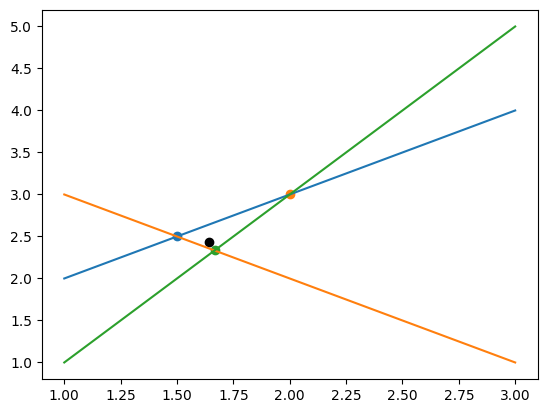

In [173]:
"""
y = x + 1
y = 4 - x
y = 2x - 1

-x + y = 1
x + y = 4
-2x + y = -1
"""

X = np.array([[-1, 1], [1, 1], [-2, 1]])
y = np.array([[1, 4, -1]]).T

center = np.linalg.inv(X.T @ X) @ X.T @ y
print(center)

plt.plot(Xs, y1, label='y1')
plt.plot(Xs, y2, label='y2')
plt.plot(Xs, y3, label='y3')
plt.scatter(*intersection_one)
plt.scatter(*intersection_two)
plt.scatter(*intersection_three)
plt.scatter(center[0], center[1], c='black')
plt.show()


In [174]:
model = LinearRegression()
model.fit(X, y)

print(model.coef_[0][0] * intersection_one[0] + 1, intersection_one)
print(4 - (model.coef_[0][1] * intersection_two[0]), intersection_two)
print(model.coef_[0][2] * intersection_three[0] - 1, intersection_three)
# y2 = 4 - x
# y3 = 2x - 1
model.coef_, model.intercept_

[3.46428571] [[1.5]
 [2.5]]
[4.] [[2.]
 [3.]]


IndexError: index 2 is out of bounds for axis 0 with size 2